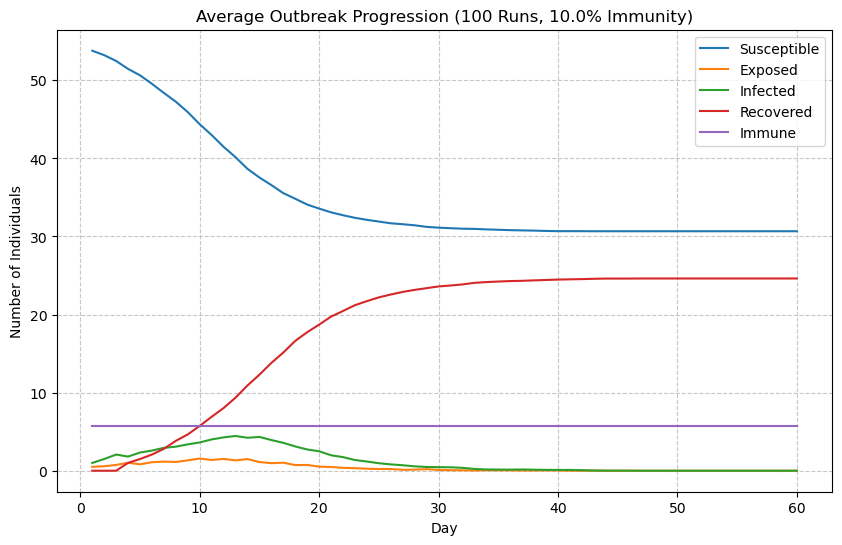

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def run_outbreak_simulation(num_runs=100, prob_immune=0.1, population_size=60, num_days=60):
    np.random.seed(2579)
    all_runs_data = []

    for run in range(num_runs):
        # Initial conditions
        p_infection = 0.01
        inf = 1
        
        # Determine initial immunity
        immune_results = np.random.binomial(1, p=prob_immune, size=population_size)
        imu = sum(immune_results)
        sus = population_size - imu
        
        rec = 0
        flu1, flu2, flu3, flu4 = 1, 0, 0, 0
        
        run_history = []

        for day in range(num_days):
            # Calculate new exposures
            outcome = np.random.binomial(n=inf, p=p_infection, size=sus)
            exp = sum(outcome)
            
            # Update compartments
            sus -= exp
            inf = flu1 + flu2 + flu3
            
            run_history.append({
                'Run': run + 1,
                'Day': day + 1,
                'Susceptible': sus,
                'Exposed': exp,
                'Recovered': rec,
                'Infected': inf,
                'Immune': imu
            })
            
            # Progress the infection cycle
            flu4 = flu3
            flu3 = flu2
            flu2 = flu1
            flu1 = exp
            rec += flu4

        all_runs_data.extend(run_history)

    return pd.DataFrame(all_runs_data)

if __name__ == "__main__":
    # Settings
    RUNS = 100
    IMMUNITY_RATE = 0.1
    
    # Run Simulation
    df_results = run_outbreak_simulation(num_runs=RUNS, prob_immune=IMMUNITY_RATE)
    
    # Calculate Averages
    df_mean = df_results.groupby('Day').mean().drop(columns=['Run'])
    
    # Visualization
    df_mean[['Susceptible', 'Exposed', 'Infected', 'Recovered', 'Immune']].plot(figsize=(10, 6))
    plt.title(f"Average Outbreak Progression ({RUNS} Runs, {IMMUNITY_RATE*100}% Immunity)")
    plt.ylabel("Number of Individuals")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()